<a href="https://colab.research.google.com/github/RitwikSharma107/covid19_ml/blob/master/Covid19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 😷 Predicting the number of resulting fatalities for future dates using machine learning.

<img 
src="https://assets.entrepreneur.com/content/3x2/2000/20200324173419-coronavirus1.jpeg"
Width = 300px>

I understand this is a serious situation, and in no way want to trivialize the human impact this crisis is causing by predicting fatalities.<br> My goal is to provide better methods for estimates that can assist medical and governmental institutions to prepare and adjust as pandemics unfold.

## Problem Defination
Predicting the number of resulting fatalities for future dates.

## Data
The data is downloaded from kaggle bluebook for COVID19 Global Forecasting:
<br>
https://www.kaggle.com/c/covid19-global-forecasting-week-4/data

I have downloaded two datasets:
* <b>train.csv</b> - the training data 
* <b>test.csv</b> - the dates to predict


## Evaluation
The goal of the project is to predict the number of resulting fatalities with accuracy of 95% and above for future dates so that necessary precautions can be taken.

## Features

### Prepare tools and load data

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load data
df = pd.read_csv("/content/drive/My Drive/Covid19 Data/train.csv")
df.shape

(28170, 6)

### Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28170 entries, 0 to 28169
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              28170 non-null  int64  
 1   Province_State  11970 non-null  object 
 2   Country_Region  28170 non-null  object 
 3   Date            28170 non-null  object 
 4   ConfirmedCases  28170 non-null  float64
 5   Fatalities      28170 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
df.isna().sum()

Id                    0
Province_State    16200
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [5]:
df.Date[:10]

0    2020-01-22
1    2020-01-23
2    2020-01-24
3    2020-01-25
4    2020-01-26
5    2020-01-27
6    2020-01-28
7    2020-01-29
8    2020-01-30
9    2020-01-31
Name: Date, dtype: object

In [6]:
#Load Data with date parsed to 'datetime64' dtype
df = pd.read_csv("/content/drive/My Drive/Covid19 Data/train.csv",low_memory=False,parse_dates=["Date"])
df.Date.dtype

dtype('<M8[ns]')

In [7]:
df.Date

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
28165   2020-04-16
28166   2020-04-17
28167   2020-04-18
28168   2020-04-19
28169   2020-04-20
Name: Date, Length: 28170, dtype: datetime64[ns]

In [8]:
#Seperate Date Information
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df["DayOfWeek"] = df.Date.dt.dayofweek
df["DayOfYear"] = df.Date.dt.dayofyear
df.shape

(28170, 11)

In [9]:
#Remove Date from data
df.drop("Date",axis=1,inplace=True)
df.shape

(28170, 10)

In [10]:
df.tail(10)

,Id,Province_State,Country_Region,ConfirmedCases,Fatalities,Year,Month,Day,DayOfWeek,DayOfYear
28160,35649,NaN,Zimbabwe,14.0,3.0,2020,4,11,5,102
28161,35650,NaN,Zimbabwe,14.0,3.0,2020,4,12,6,103
28162,35651,NaN,Zimbabwe,17.0,3.0,2020,4,13,0,104
28163,35652,NaN,Zimbabwe,17.0,3.0,2020,4,14,1,105
28164,35653,NaN,Zimbabwe,23.0,3.0,2020,4,15,2,106
28165,35654,NaN,Zimbabwe,23.0,3.0,2020,4,16,3,107
28166,35655,NaN,Zimbabwe,24.0,3.0,2020,4,17,4,108
28167,35656,NaN,Zimbabwe,25.0,3.0,2020,4,18,5,109
28168,35657,NaN,Zimbabwe,25.0,3.0,2020,4,19,6,110
28169,35658,NaN,Zimbabwe,25.0,3.0,2020,4,20,0,111


In [11]:
# Maximum country regions
df.Country_Region.value_counts()

US                4860
China             2970
Canada            1080
France             990
United Kingdom     990
                  ... 
South Africa        90
Bulgaria            90
Sudan               90
Nicaragua           90
Chad                90
Name: Country_Region, Length: 184, dtype: int64

In [93]:
# Top 10 countries affected by Covid19
df_Country = df.groupby(['Country_Region']).mean()
df_Country = df_Country.drop(['Id','Year','Month','Day','DayOfWeek','DayOfYear'],axis=1)
Top10 = df_Country.sort_values('Fatalities', ascending=False)
Top10[:10]

,ConfirmedCases,Fatalities
Country_Region,,
Italy,46470.700000,5515.955556
Spain,43230.711111,4142.288889
Iran,20946.900000,1321.366667
Belgium,7009.500000,741.511111
Germany,32967.944444,667.955556
France,2540.535354,283.996970
Brazil,5141.622222,281.300000
Turkey,11926.733333,257.600000
Switzerland,7045.722222,249.822222


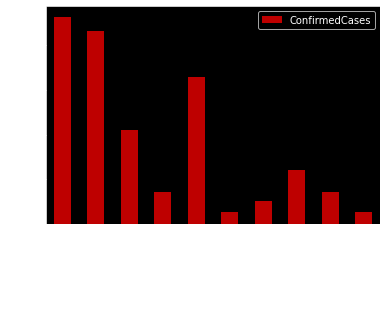

In [94]:
# Top10 countries with most fatalities
Top10 = Top10.reset_index()
Top10[:10].plot(x="Country_Region", y="ConfirmedCases", kind="bar", color='r', alpha=0.75);

In [108]:
# Maximum no. of fatalities
df1 = df[df['Fatalities']==max(df.Fatalities)]
Country = df1['Country_Region'][df1.index[0]]
Con_Cases = df1['ConfirmedCases'][df1.index[0]]
Fatal = df1['Fatalities'][df1.index[0]]
print('Country with maximum number of the fatalities:')
print('Country: '+Country)
print('Confirmed cases: '+str(Con_Cases))
print('Fatalities: '+str(Fatal))

Country with maximum number of the fatalities:
Country: Italy
Confirmed cases: 181228.0
Fatalities: 24114.0


In [70]:
# Average number of cases and fatalities in India
df_ = df_Country.reset_index()
df_[df_['Country_Region']=='India']

,Country_Region,ConfirmedCases,Fatalities
78,India,2066.833333,65.888889


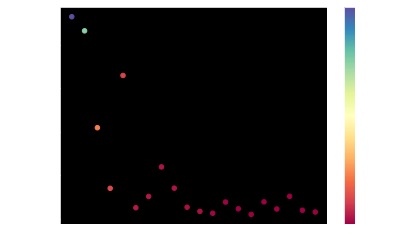

In [114]:
# Relation between Fatalities and Confirmed Cases
Top10[:20].plot.scatter('Country_Region', 'ConfirmedCases', c='Fatalities', colormap='Spectral')

In [115]:
# Relation between fatalities and confirmed cases
df['Fatalities'].corr(df['ConfirmedCases'])

0.8906165097252351

### Convert data to numerical/category dtype

In [0]:
#Check which content is string
for label,content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Province_State
Country_Region


In [0]:
#Convert all string contents into categories
for label,content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = content.astype("category").cat.as_ordered()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28170 entries, 0 to 28169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              28170 non-null  int64   
 1   Province_State  11970 non-null  category
 2   Country_Region  28170 non-null  category
 3   ConfirmedCases  28170 non-null  float64 
 4   Fatalities      28170 non-null  float64 
 5   Year            28170 non-null  int64   
 6   Month           28170 non-null  int64   
 7   Day             28170 non-null  int64   
 8   DayOfWeek       28170 non-null  int64   
 9   DayOfYear       28170 non-null  int64   
dtypes: category(2), float64(2), int64(6)
memory usage: 1.8 MB


In [0]:
#Now the string data is stored as numeric codes (Two ways of display)
df.Country_Region.cat.codes, pd.Categorical(df["Province_State"]).codes

(0          0
 1          0
 2          0
 3          0
 4          0
         ... 
 28165    183
 28166    183
 28167    183
 28168    183
 28169    183
 Length: 28170, dtype: int16,
 array([-1, -1, -1, ..., -1, -1, -1], dtype=int16))

### Missing Values

In [0]:
#Check for missing values
df.isna().sum()

Id                    0
Province_State    16200
Country_Region        0
ConfirmedCases        0
Fatalities            0
Year                  0
Month                 0
Day                   0
DayOfWeek             0
DayOfYear             0
dtype: int64

In [0]:
#Check for missing numerical values
for label,content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [0]:
#Check for missing categorial values
for label,content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
      print(label)

Province_State
Country_Region


In [0]:
#Turn categorial values into no. and fill missing
for label,content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    
    #Add Binary value to indicate whether sample has missing value
    df[label+'is_missing'] = pd.isnull(content)

    #Turn categories into numbers and add 1 (for categories which have values = -1)
    df[label] = pd.Categorical(content).codes +1

#Now two columns will be added to compensate for missing values
df.shape

(28170, 12)

In [0]:
#Check for missing values
df.isna().sum()

Id                          0
Province_State              0
Country_Region              0
ConfirmedCases              0
Fatalities                  0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
DayOfYear                   0
Province_Stateis_missing    0
Country_Regionis_missing    0
dtype: int64

## Modelling


### Prepare tools and get data ready

In [0]:
#Import libraries

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [0]:
#Get data ready
x = df.drop("Fatalities",axis=1)
y = df["Fatalities"]


#Split the data
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2)

### Fit the model and calculate score 

In [0]:
%%time

#Instantiate the classifier
clf = RandomForestRegressor(n_jobs=1, random_state=42)

#Fit the model
clf.fit(x_train,y_train)
print(clf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
CPU times: user 8.47 s, sys: 3.98 ms, total: 8.47 s
Wall time: 8.48 s


In [0]:
#Prediction
y_preds = clf.predict(x_valid)
y_preds


array([ 0.  ,  0.  ,  0.97, ...,  0.73, 10.92,  0.04])

In [0]:

#Actual data
np.array(y_valid)


array([ 0.,  0.,  1., ...,  0., 10.,  0.])

In [0]:

#Score
clf.score(x_valid,y_valid)

0.9678486504471759

### Improve the model

In [0]:
#Improve the model using RandomizedSearchCV
%%time

#Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "auto", "sqrt"]}
      
# Setup random hyperparameter search for RandomForestClassifier
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,random_state=42), 
                           param_distributions=rf_grid,
                           n_iter=5,
                           cv=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   13.1s finished


CPU times: user 14 s, sys: 14 ms, total: 14 s
Wall time: 14 s


In [0]:
# Find the best hyperparameters
rs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 40}

In [0]:
rs_model.score(x_valid,y_valid)

0.9450912059191642

In [0]:
#Improve the model using GridSearchCV 
%%time

#Different RandomForestRegressor hyperparameters
grid = {"n_estimators": [40,100],
        "min_samples_split": [8,10],
        "min_samples_leaf": [1,2],
        "max_features": ["auto","sqrt"]}

gs_model = GridSearchCV(RandomForestRegressor(n_jobs=1,random_state=42),
                           param_grid=grid,
                           cv=5,
                           verbose=2)

gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40, total=   2.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40, total=   2.7s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40, total=   2.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40, total=   2.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=40, total=   2.6s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   6.5s
[CV] max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   6.5s
[CV]

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.9min finished


CPU times: user 3min 57s, sys: 139 ms, total: 3min 57s
Wall time: 3min 57s


In [0]:
gs_model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
gs_model.score(x_valid,y_valid)

0.9474425377702801

### Choose best model for testing data

In [0]:
#Comparing scores
print(f"Base Model: {clf.score(x_valid,y_valid) *100:2f} %")
print(f"RandomizedSearchCV Model: {rs_model.score(x_valid,y_valid) *100:2f} %")
print(f"GridSearchCV  Model: {gs_model.score(x_valid,y_valid) *100:2f} %")

Base Model: 96.784865 %
RandomizedSearchCV Model: 94.509121 %
GridSearchCV  Model: 94.744254 %


In [0]:
#R^2 Score of best model
print(f"R^2: {r2_score(y_valid,y_preds)} ")

R^2: 0.9678486504471759 


## Evaluation

### Load testing data

In [0]:
#Evaluating the best model

#Load Test Data
df_test = pd.read_csv("/content/drive/My Drive/Covid19 Data/test.csv",low_memory=False,parse_dates=["Date"])
df_test.shape

(13459, 4)

### Preprocess the data for testing

In [0]:
df_test.info() #Fatalities is missing which we want to predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ForecastId      13459 non-null  int64         
 1   Province_State  5719 non-null   object        
 2   Country_Region  13459 non-null  object        
 3   Date            13459 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 420.7+ KB


In [0]:
df_test.isna().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

In [0]:
#Seperate Date Information
df_test["Year"] = df_test.Date.dt.year
df_test["Month"] = df_test.Date.dt.month
df_test["Day"] = df_test.Date.dt.day
df_test["DayOfWeek"] = df_test.Date.dt.dayofweek
df_test["DayOfYear"] = df_test.Date.dt.dayofyear
df_test.shape

(13459, 9)

In [0]:
#Remove Date from data
df_test.drop("Date",axis=1,inplace=True)
df_test.shape

(13459, 8)

In [0]:
#Check which content is string
for label,content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Province_State
Country_Region


In [0]:
#Convert all string contents into categories
for label,content in df_test.items():
  if pd.api.types.is_string_dtype(content):
    df_test[label] = content.astype("category").cat.as_ordered()

In [0]:
#Check for missing values
df_test.isna().sum()

ForecastId           0
Province_State    7740
Country_Region       0
Year                 0
Month                0
Day                  0
DayOfWeek            0
DayOfYear            0
dtype: int64

In [0]:
#Check for missing numerical values
for label,content in df_test.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [0]:
#Check for missing categorial values
for label,content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
      print(label)

Province_State
Country_Region


In [0]:
#Turn categorial values into no. and fill missing
for label,content in df_test.items():
  if not pd.api.types.is_numeric_dtype(content):
    
    #Add Binary value to indicate whether sample has missing value
    df_test[label+'is_missing'] = pd.isnull(content)

    #Turn categories into numbers and add 1 (for categories which have values = -1)
    df_test[label] = pd.Categorical(content).codes +1

#Now two columns will be added to compensate for missing values
df_test.shape

(13459, 10)

In [0]:
df_test.isna().sum()

ForecastId                  0
Province_State              0
Country_Region              0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
DayOfYear                   0
Province_Stateis_missing    0
Country_Regionis_missing    0
dtype: int64

In [0]:
#We can verify the column difference between training data and test data
set(x_train.columns)-set(df_test.columns)

{'ConfirmedCases', 'Id'}

In [0]:
#Manually adjust the columns in testing data
df_test["ConfirmedCases"] = 0

### Predictions of Testing data

In [0]:
#Make predictions on test data
test_preds = clf.predict(df_test)
test_preds

array([240.65, 240.65, 240.65, ...,  51.03,  51.07,  50.7 ])

In [0]:
#Format predictions for proper display
df_preds = pd.DataFrame()
df_preds["ForecastId"] = df_test["ForecastId"]
df_preds["Province_State"] = df_test["Province_State"]
df_preds["Country_Region"] = df_test["Country_Region"]
df_preds["Year"] = df_test["Year"]
df_preds["Month"] = df_test["Month"]
df_preds["Day"] = df_test["Day"]
df_preds["Fatalities"] = test_preds

#Predictions till 14th MAY 2020
df_preds

,ForecastId,Province_State,Country_Region,Year,Month,Day,Fatalities
0,1,0,1,2020,4,2,240.65
1,2,0,1,2020,4,3,240.65
2,3,0,1,2020,4,4,240.65
3,4,0,1,2020,4,5,240.65
4,5,0,1,2020,4,6,240.65
...,...,...,...,...,...,...,...
13454,13455,0,184,2020,5,10,51.08
13455,13456,0,184,2020,5,11,51.03
13456,13457,0,184,2020,5,12,51.03
13457,13458,0,184,2020,5,13,51.07


## Conclusion

* It is analysed that the number of fatalities increase with the number of cases.
* Therfore, it is necessary to reduce the number of upcoming cases in order to reduce the deaths across the world.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img 
src="https://specials-images.forbesimg.com/imageserve/5e8b6a6a3ace6200072c73d0/960x0.jpg?fit=scale"
Width = 300px>